In [4]:
!pip install PyWavelets matplotlib scipy

  Using cached matplotlib-3.9.0-cp310-cp310-win_amd64.whl.metadata (11 kB)
     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     --------------------------------- ------ 51.2/60.6 kB 2.7 MB/s eta 0:00:01
     ---------------------------------------- 60.6/60.6 kB 1.1 MB/s eta 0:00:00
     ---------------------------------------- 0.0/165.5 kB ? eta -:--:--
     ---------------------------- --------- 122.9/165.5 kB 2.4 MB/s eta 0:00:01
     -------------------------------------  163.8/165.5 kB 2.4 MB/s eta 0:00:01
     -------------------------------------- 165.5/165.5 kB 1.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/8.0 MB 1.7 MB/s eta 0:00:05
    --------------------------------------- 0.2/8.0 MB 1.7 MB/s eta 0:00:05
   - -------------------------------------- 0.2/8.0 MB 2.0 MB/s eta 0:00:04
   - -------------------------------------- 0.2/8.0 MB 2.0 MB/s eta 0:00:04
   -- -

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
from scipy.io import loadmat

# Load data
data = loadmat('D:\\NITRR-Vivek\\IITRAM\\PPGArrhythmiaDetection-main\\valid_testDataset\\MPA_181220181216.mat')
label_map = {
    0: "Sinus rhythm",
    1: "Premature ventricular contraction",
    2: "Premature atrial contraction",
    3: "Ventricular tachycardia",
    4: "Supraventricular tachycardia",
    5: "Atrial fibrillation"
} 
ppgseg = data['ppgseg']
labels = data['labels'].flatten()

unique_labels, counts = np.unique(labels, return_counts=True)

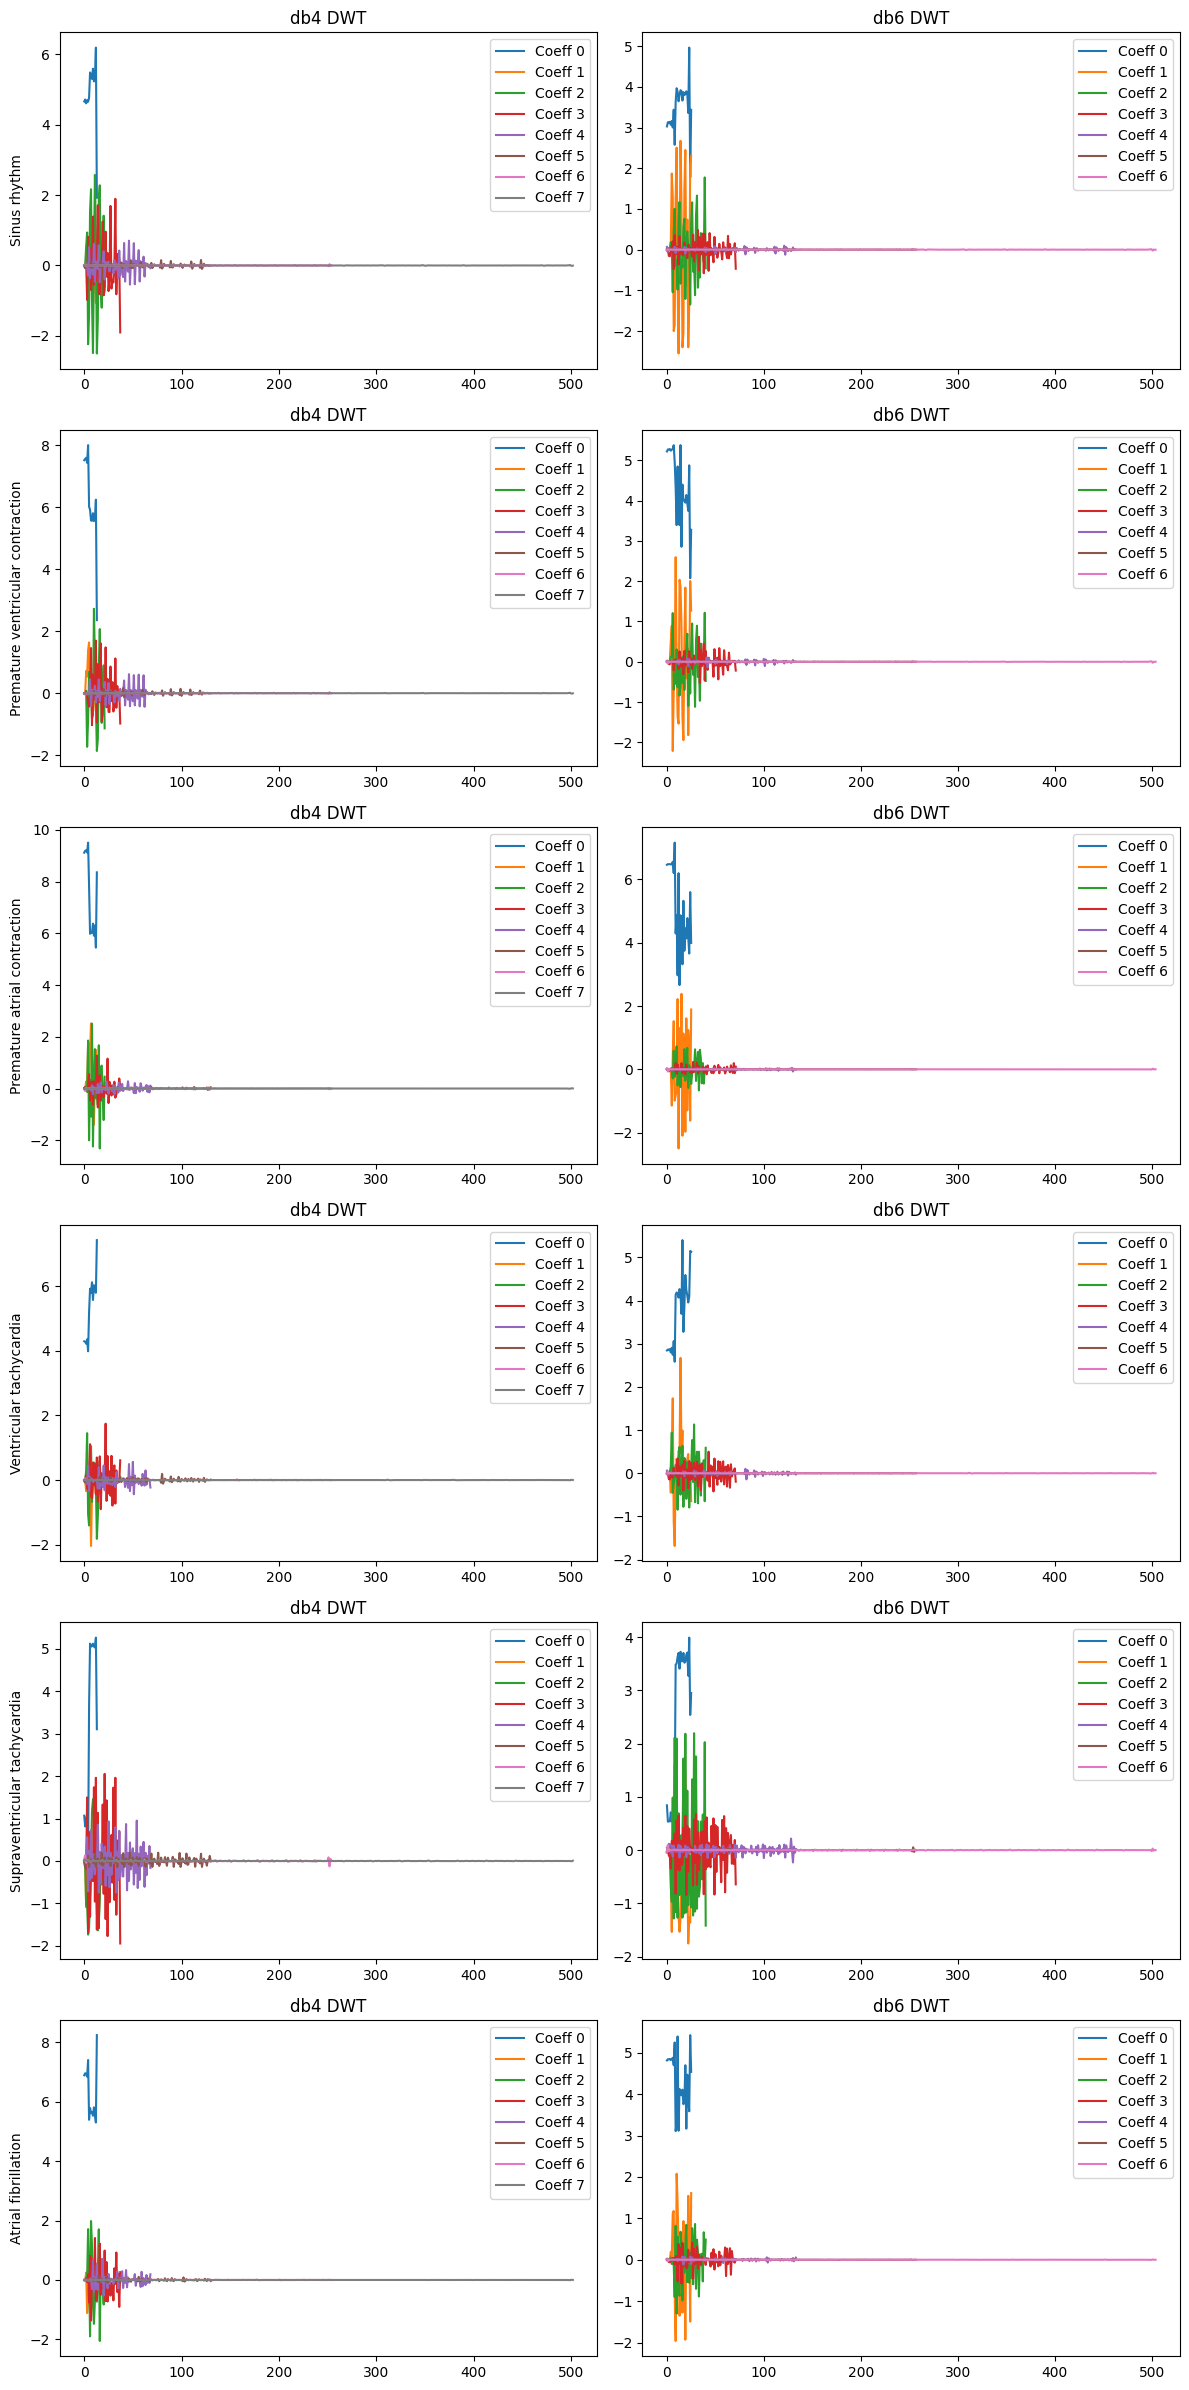

Unique labels and their counts:
0: 51
1: 25
2: 2
3: 10
4: 90
5: 21


In [6]:
# Function to perform DWT and plot
def plot_dwt(signal, wavelet_name, ax):
    coeffs = pywt.wavedec(signal, wavelet_name)
    for i, coeff in enumerate(coeffs):
        ax.plot(coeff, label=f'Coeff {i}')
    ax.set_title(f'{wavelet_name} DWT')
    ax.legend()

# Plot settings
rows = len(unique_labels)
cols = 2
fig, axes = plt.subplots(rows, cols, figsize=(12, rows * 4))  

# Plot DWT for db4 and db6 for each unique label
for idx, label in enumerate(unique_labels):
    ppg_subset = ppgseg[labels == label]
    sample_ppg = ppg_subset[0]

    time = np.linspace(0, 10, sample_ppg.shape[0])
    
    # Plotting db4 DWT
    ax = axes[idx, 0]
    plot_dwt(sample_ppg, 'db4', ax)
    ax.set_ylabel(label_map.get(label, f"Label: {label}"))
    
    # Plotting db6 DWT
    ax = axes[idx, 1]
    plot_dwt(sample_ppg, 'db6', ax)

# Adjust layout and display
plt.tight_layout()
plt.show()

# Print unique labels and their counts
print("Unique labels and their counts:")
for label, count in zip(unique_labels, counts):
    print(f"{label}: {count}")


### Plotting CWT: DB4, Level3

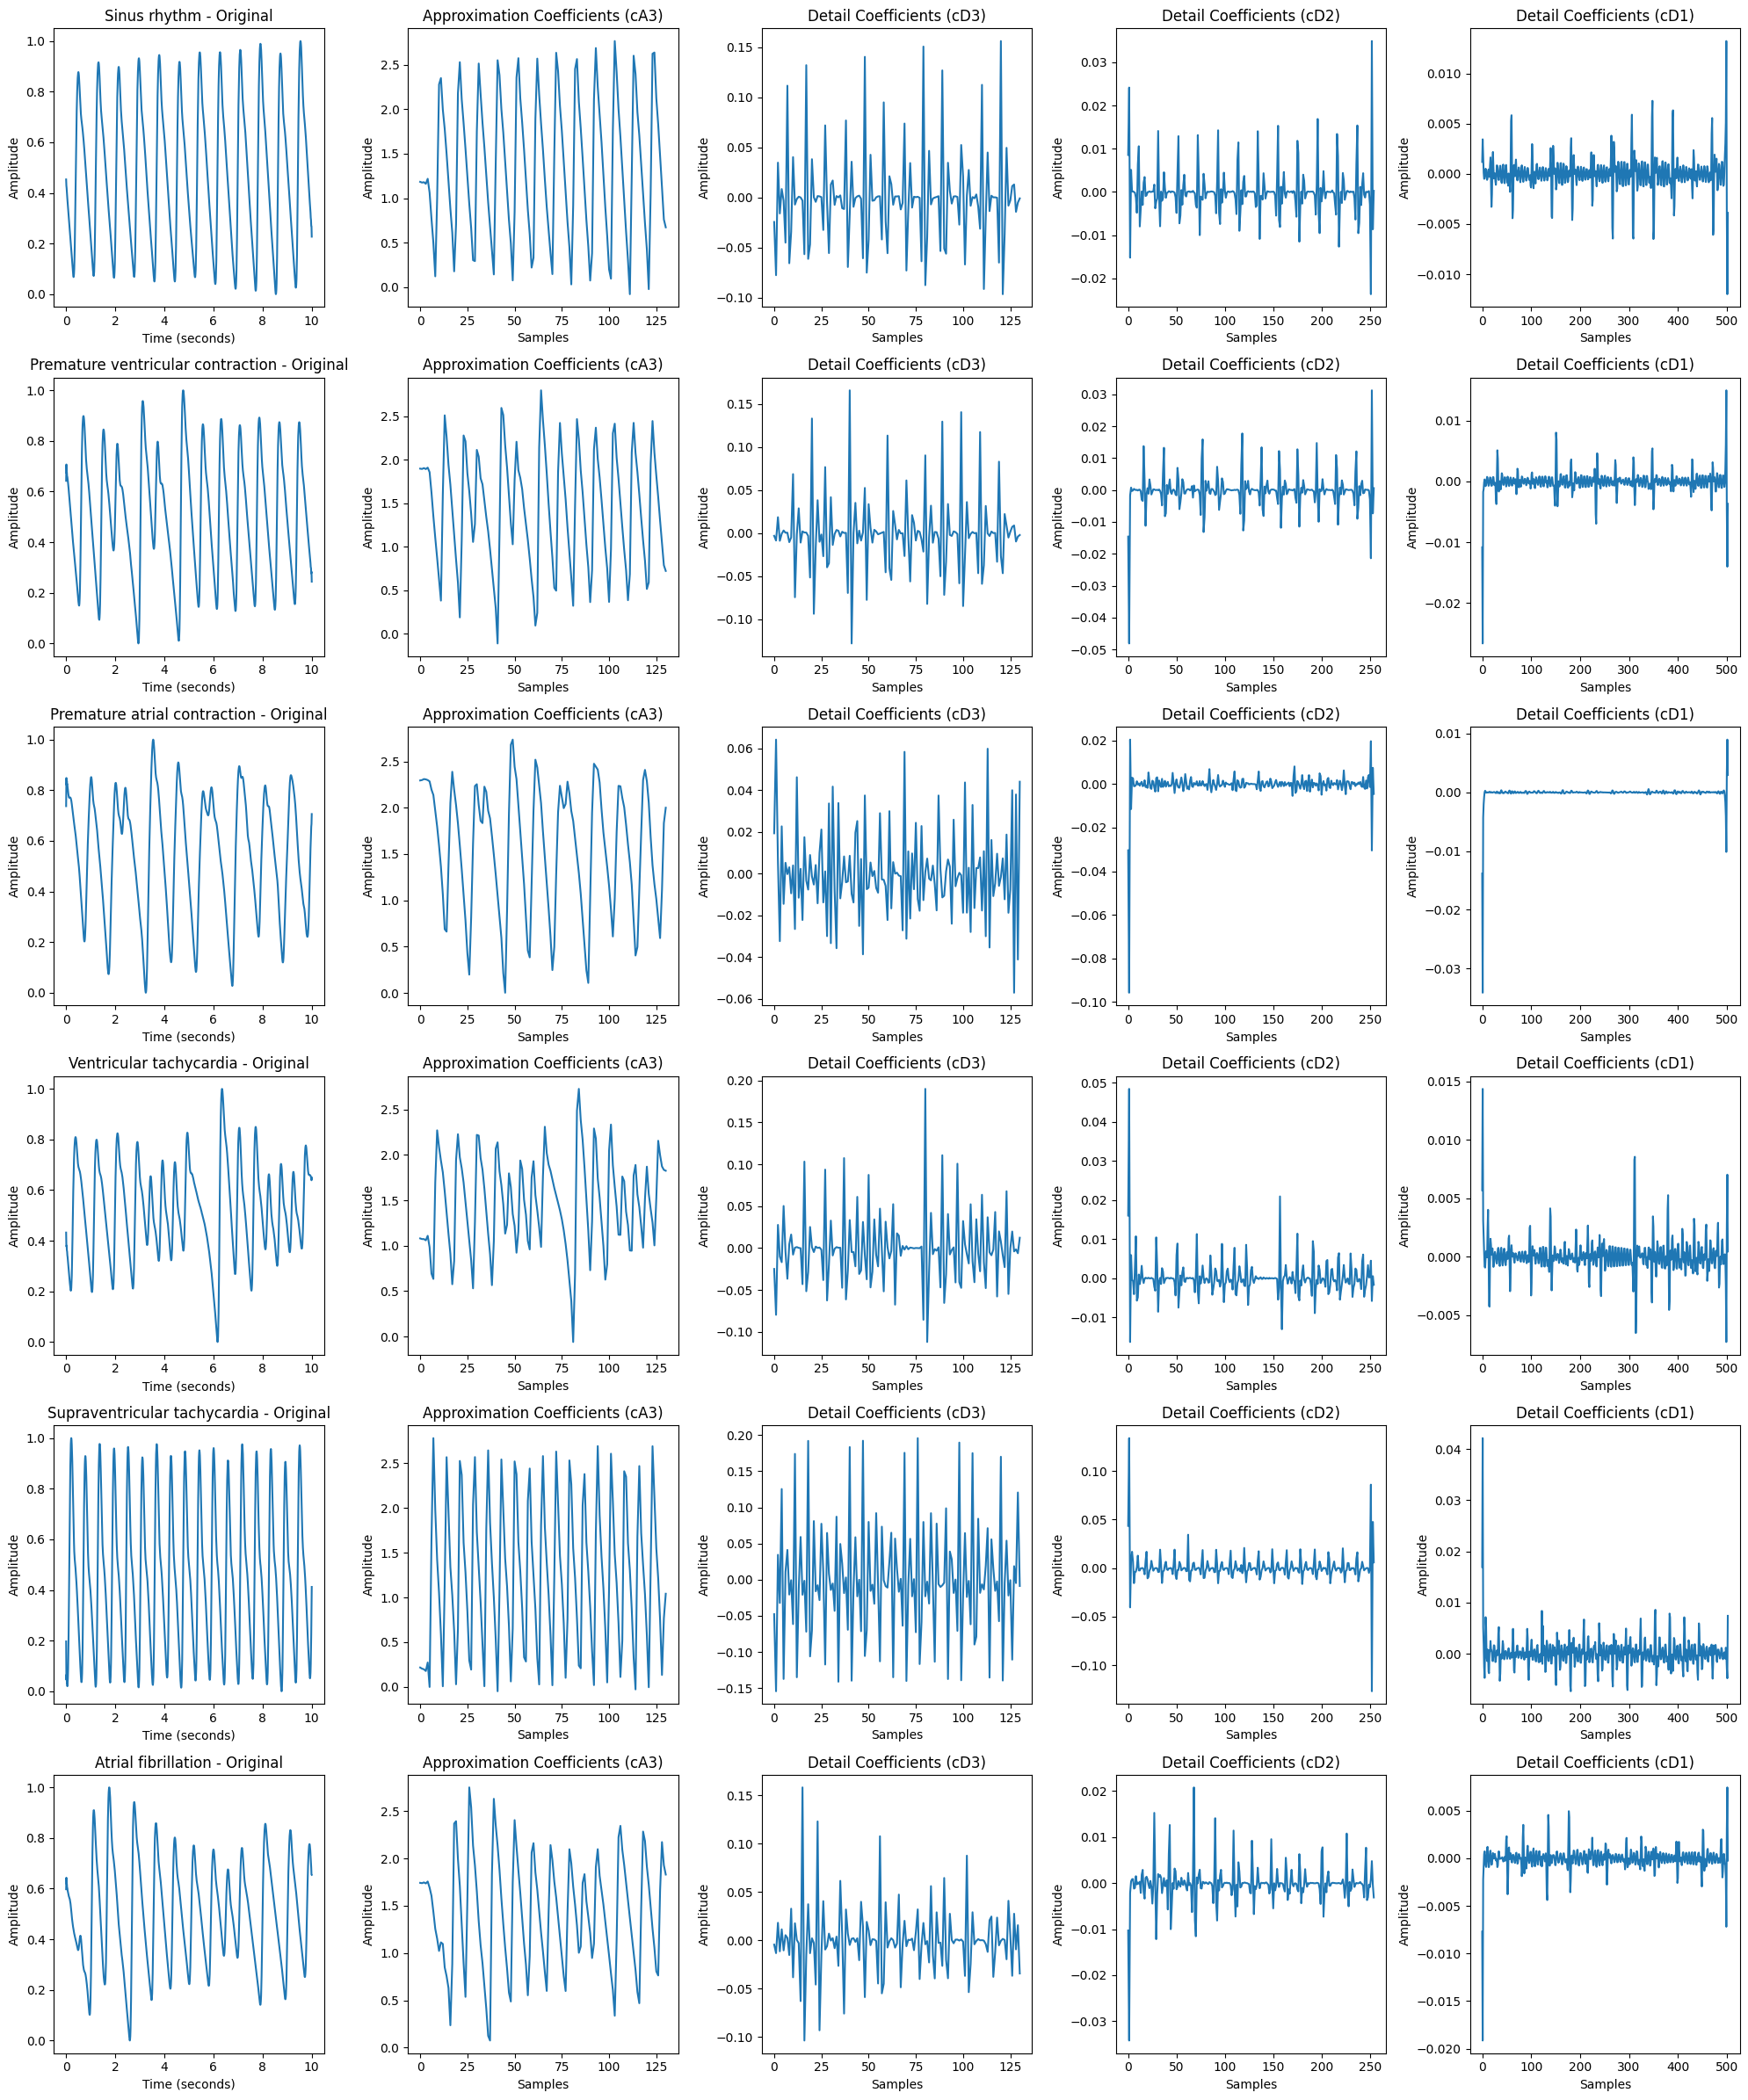

In [7]:
rows = len(unique_labels)
cols = 5  
fig, axes = plt.subplots(rows, cols, figsize=(20, 4*rows))

plot_count = 0
for label, count in zip(unique_labels, counts):
    ppg_subset = ppgseg[labels == label]
    signal = ppg_subset[0]   

    coeffs = pywt.wavedec(signal, 'db4', level=3)
    cA3, cD3, cD2, cD1 = coeffs

    time = np.linspace(0, len(signal)/100, len(signal))   
 
    ax = axes[plot_count, 0]
    ax.plot(time, signal)
    ax.set_xlabel('Time (seconds)')
    ax.set_ylabel('Amplitude')
    ax.set_title(f"{label_map.get(label, f'Label: {label}')} - Original")
 
    ax = axes[plot_count, 1]
    ax.plot(cA3)
    ax.set_xlabel('Samples')
    ax.set_ylabel('Amplitude')
    ax.set_title('Approximation Coefficients (cA3)')
 
    ax = axes[plot_count, 2]
    ax.plot(cD3)
    ax.set_xlabel('Samples')
    ax.set_ylabel('Amplitude')
    ax.set_title('Detail Coefficients (cD3)')
 
    ax = axes[plot_count, 3]
    ax.plot(cD2)
    ax.set_xlabel('Samples')
    ax.set_ylabel('Amplitude')
    ax.set_title('Detail Coefficients (cD2)')
 
    ax = axes[plot_count, 4]
    ax.plot(cD1)
    ax.set_xlabel('Samples')
    ax.set_ylabel('Amplitude')
    ax.set_title('Detail Coefficients (cD1)')

    plot_count += 1

plt.tight_layout()
plt.show()

### Plotting CWT: DB4, Level6

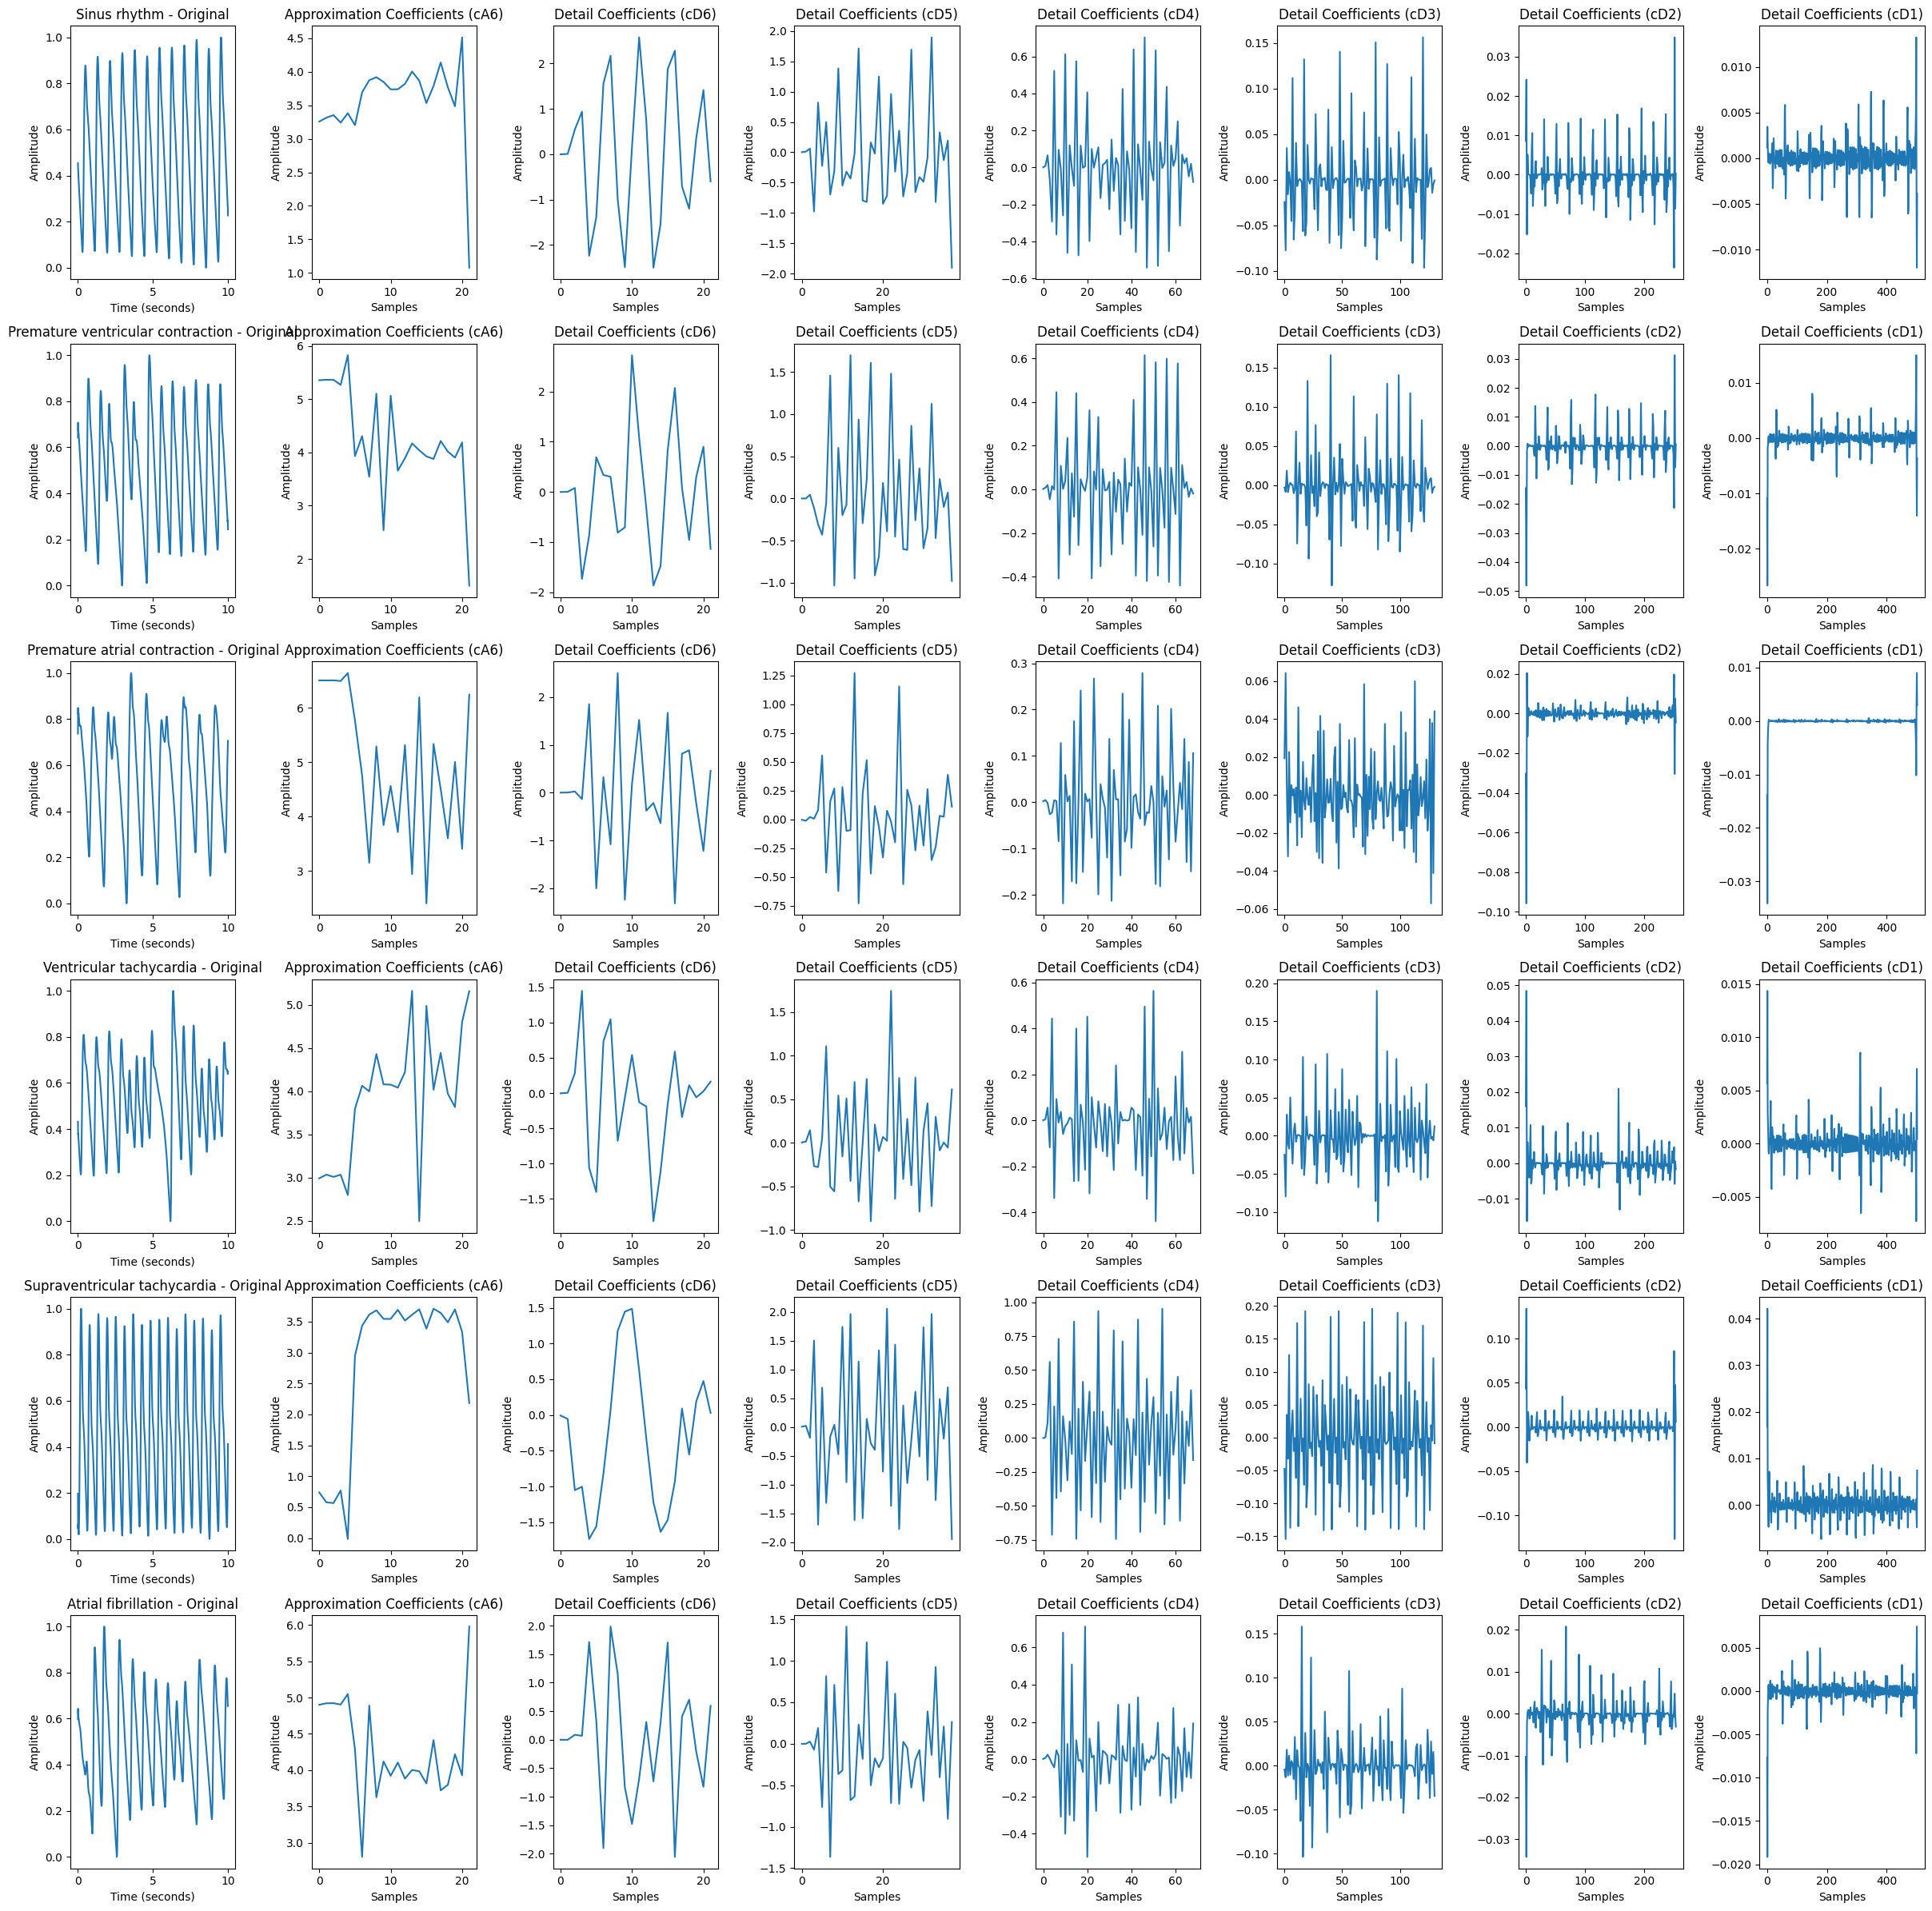

In [8]:
rows = len(unique_labels)
cols = 8  
fig, axes = plt.subplots(rows, cols, figsize=(24, 4*rows))

plot_count = 0
for label in unique_labels:
    ppg_subset = ppgseg[labels == label]
    signal = ppg_subset[0]   
 
    coeffs = pywt.wavedec(signal, 'db4', level=6)
    cA6, cD6, cD5, cD4, cD3, cD2, cD1 = coeffs

    time = np.linspace(0, len(signal)/100, len(signal))   
 
    ax = axes[plot_count, 0]
    ax.plot(time, signal)
    ax.set_xlabel('Time (seconds)')
    ax.set_ylabel('Amplitude')
    ax.set_title(f"{label_map.get(label, f'Label: {label}')} - Original")

    for i, (coeff, title) in enumerate(zip(
        [cA6, cD6, cD5, cD4, cD3, cD2, cD1],
        ['Approximation Coefficients (cA6)', 'Detail Coefficients (cD6)',
         'Detail Coefficients (cD5)', 'Detail Coefficients (cD4)',
         'Detail Coefficients (cD3)', 'Detail Coefficients (cD2)',
         'Detail Coefficients (cD1)']
    )):
        ax = axes[plot_count, i + 1]
        ax.plot(coeff)
        ax.set_xlabel('Samples')
        ax.set_ylabel('Amplitude')
        ax.set_title(title)

    plot_count += 1

plt.tight_layout()
plt.show()

### Plotting CWT: DB6, Level5

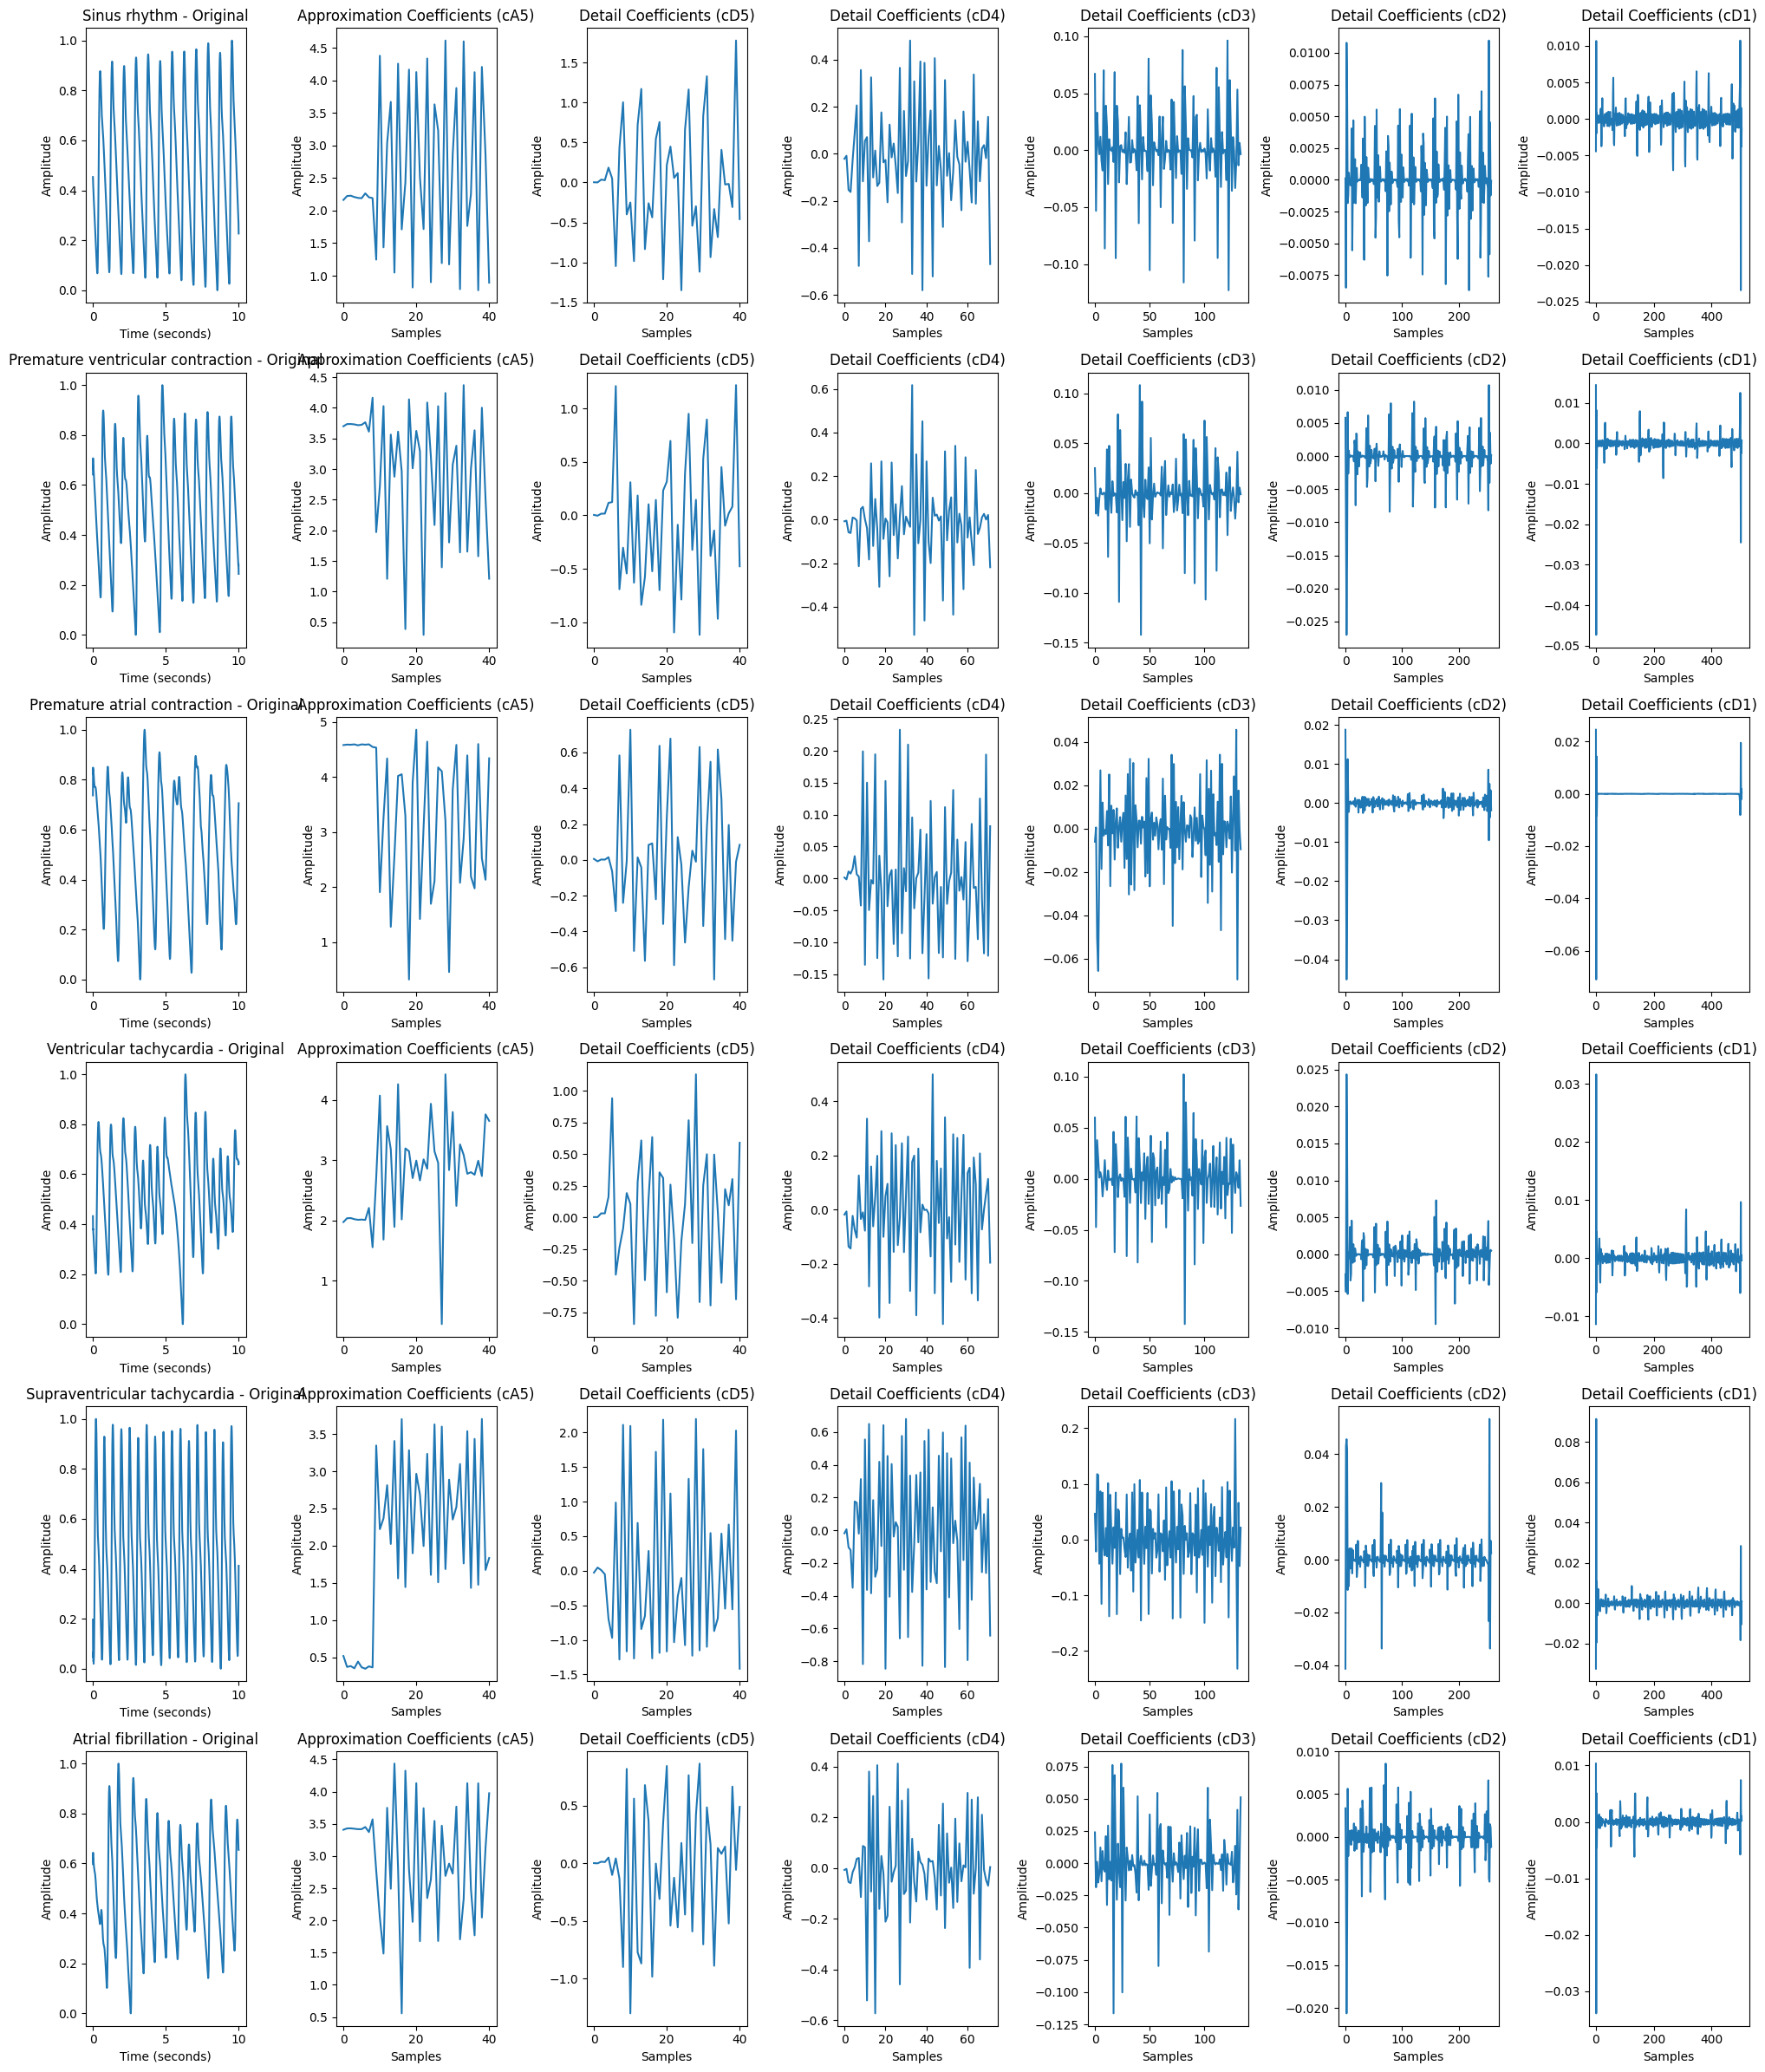

In [9]:
rows = len(unique_labels)
cols = 7   
fig, axes = plt.subplots(rows, cols, figsize=(20, 4*rows))

plot_count = 0
for label, count in zip(unique_labels, counts):
    ppg_subset = ppgseg[labels == label]
    signal = ppg_subset[0]   

    
    coeffs = pywt.wavedec(signal, 'db6', level=5)
    cA5, cD5, cD4, cD3, cD2, cD1 = coeffs

    time = np.linspace(0, len(signal)/100, len(signal))   

   
    ax = axes[plot_count, 0]
    ax.plot(time, signal)
    ax.set_xlabel('Time (seconds)')
    ax.set_ylabel('Amplitude')
    ax.set_title(f"{label_map.get(label, f'Label: {label}')} - Original")

    # Low frequency level-5  
    ax = axes[plot_count, 1]
    ax.plot(cA5)
    ax.set_xlabel('Samples')
    ax.set_ylabel('Amplitude')
    ax.set_title('Approximation Coefficients (cA5)')

    # High frequency level-5 
    ax = axes[plot_count, 2]
    ax.plot(cD5)
    ax.set_xlabel('Samples')
    ax.set_ylabel('Amplitude')
    ax.set_title('Detail Coefficients (cD5)')

    # High frequency level-4  
    ax = axes[plot_count, 3]
    ax.plot(cD4)
    ax.set_xlabel('Samples')
    ax.set_ylabel('Amplitude')
    ax.set_title('Detail Coefficients (cD4)')

    # High frequency level-3  
    ax = axes[plot_count, 4]
    ax.plot(cD3)
    ax.set_xlabel('Samples')
    ax.set_ylabel('Amplitude')
    ax.set_title('Detail Coefficients (cD3)')

    # High frequency level-2  
    ax = axes[plot_count, 5]
    ax.plot(cD2)
    ax.set_xlabel('Samples')
    ax.set_ylabel('Amplitude')
    ax.set_title('Detail Coefficients (cD2)')

    # High frequency level-1  
    ax = axes[plot_count, 6]
    ax.plot(cD1)
    ax.set_xlabel('Samples')
    ax.set_ylabel('Amplitude')
    ax.set_title('Detail Coefficients (cD1)')

    plot_count += 1

plt.tight_layout()
plt.show()

### Plotting Hjorth parameters and Entropy for Each Sub-Bands in CWT: DB4, Level3

C:\Users\Harsh's PC\AppData\Local\Temp\ipykernel_18052\1316851256.py:45: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i, j*2].boxplot(hjorth_params, labels=['Activity', 'Mobility', 'Complexity'])
C:\Users\Harsh's PC\AppData\Local\Temp\ipykernel_18052\1316851256.py:51: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i, j*2+1].boxplot(entropy_vals, labels=['Entropy'])
C:\Users\Harsh's PC\AppData\Local\Temp\ipykernel_18052\1316851256.py:45: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i, j*2].boxplot(hjorth_params, labels=['Activity', 'Mobility', 'Complexity'])
C:\Users\Harsh's PC\AppData\Local\Temp\ipyker

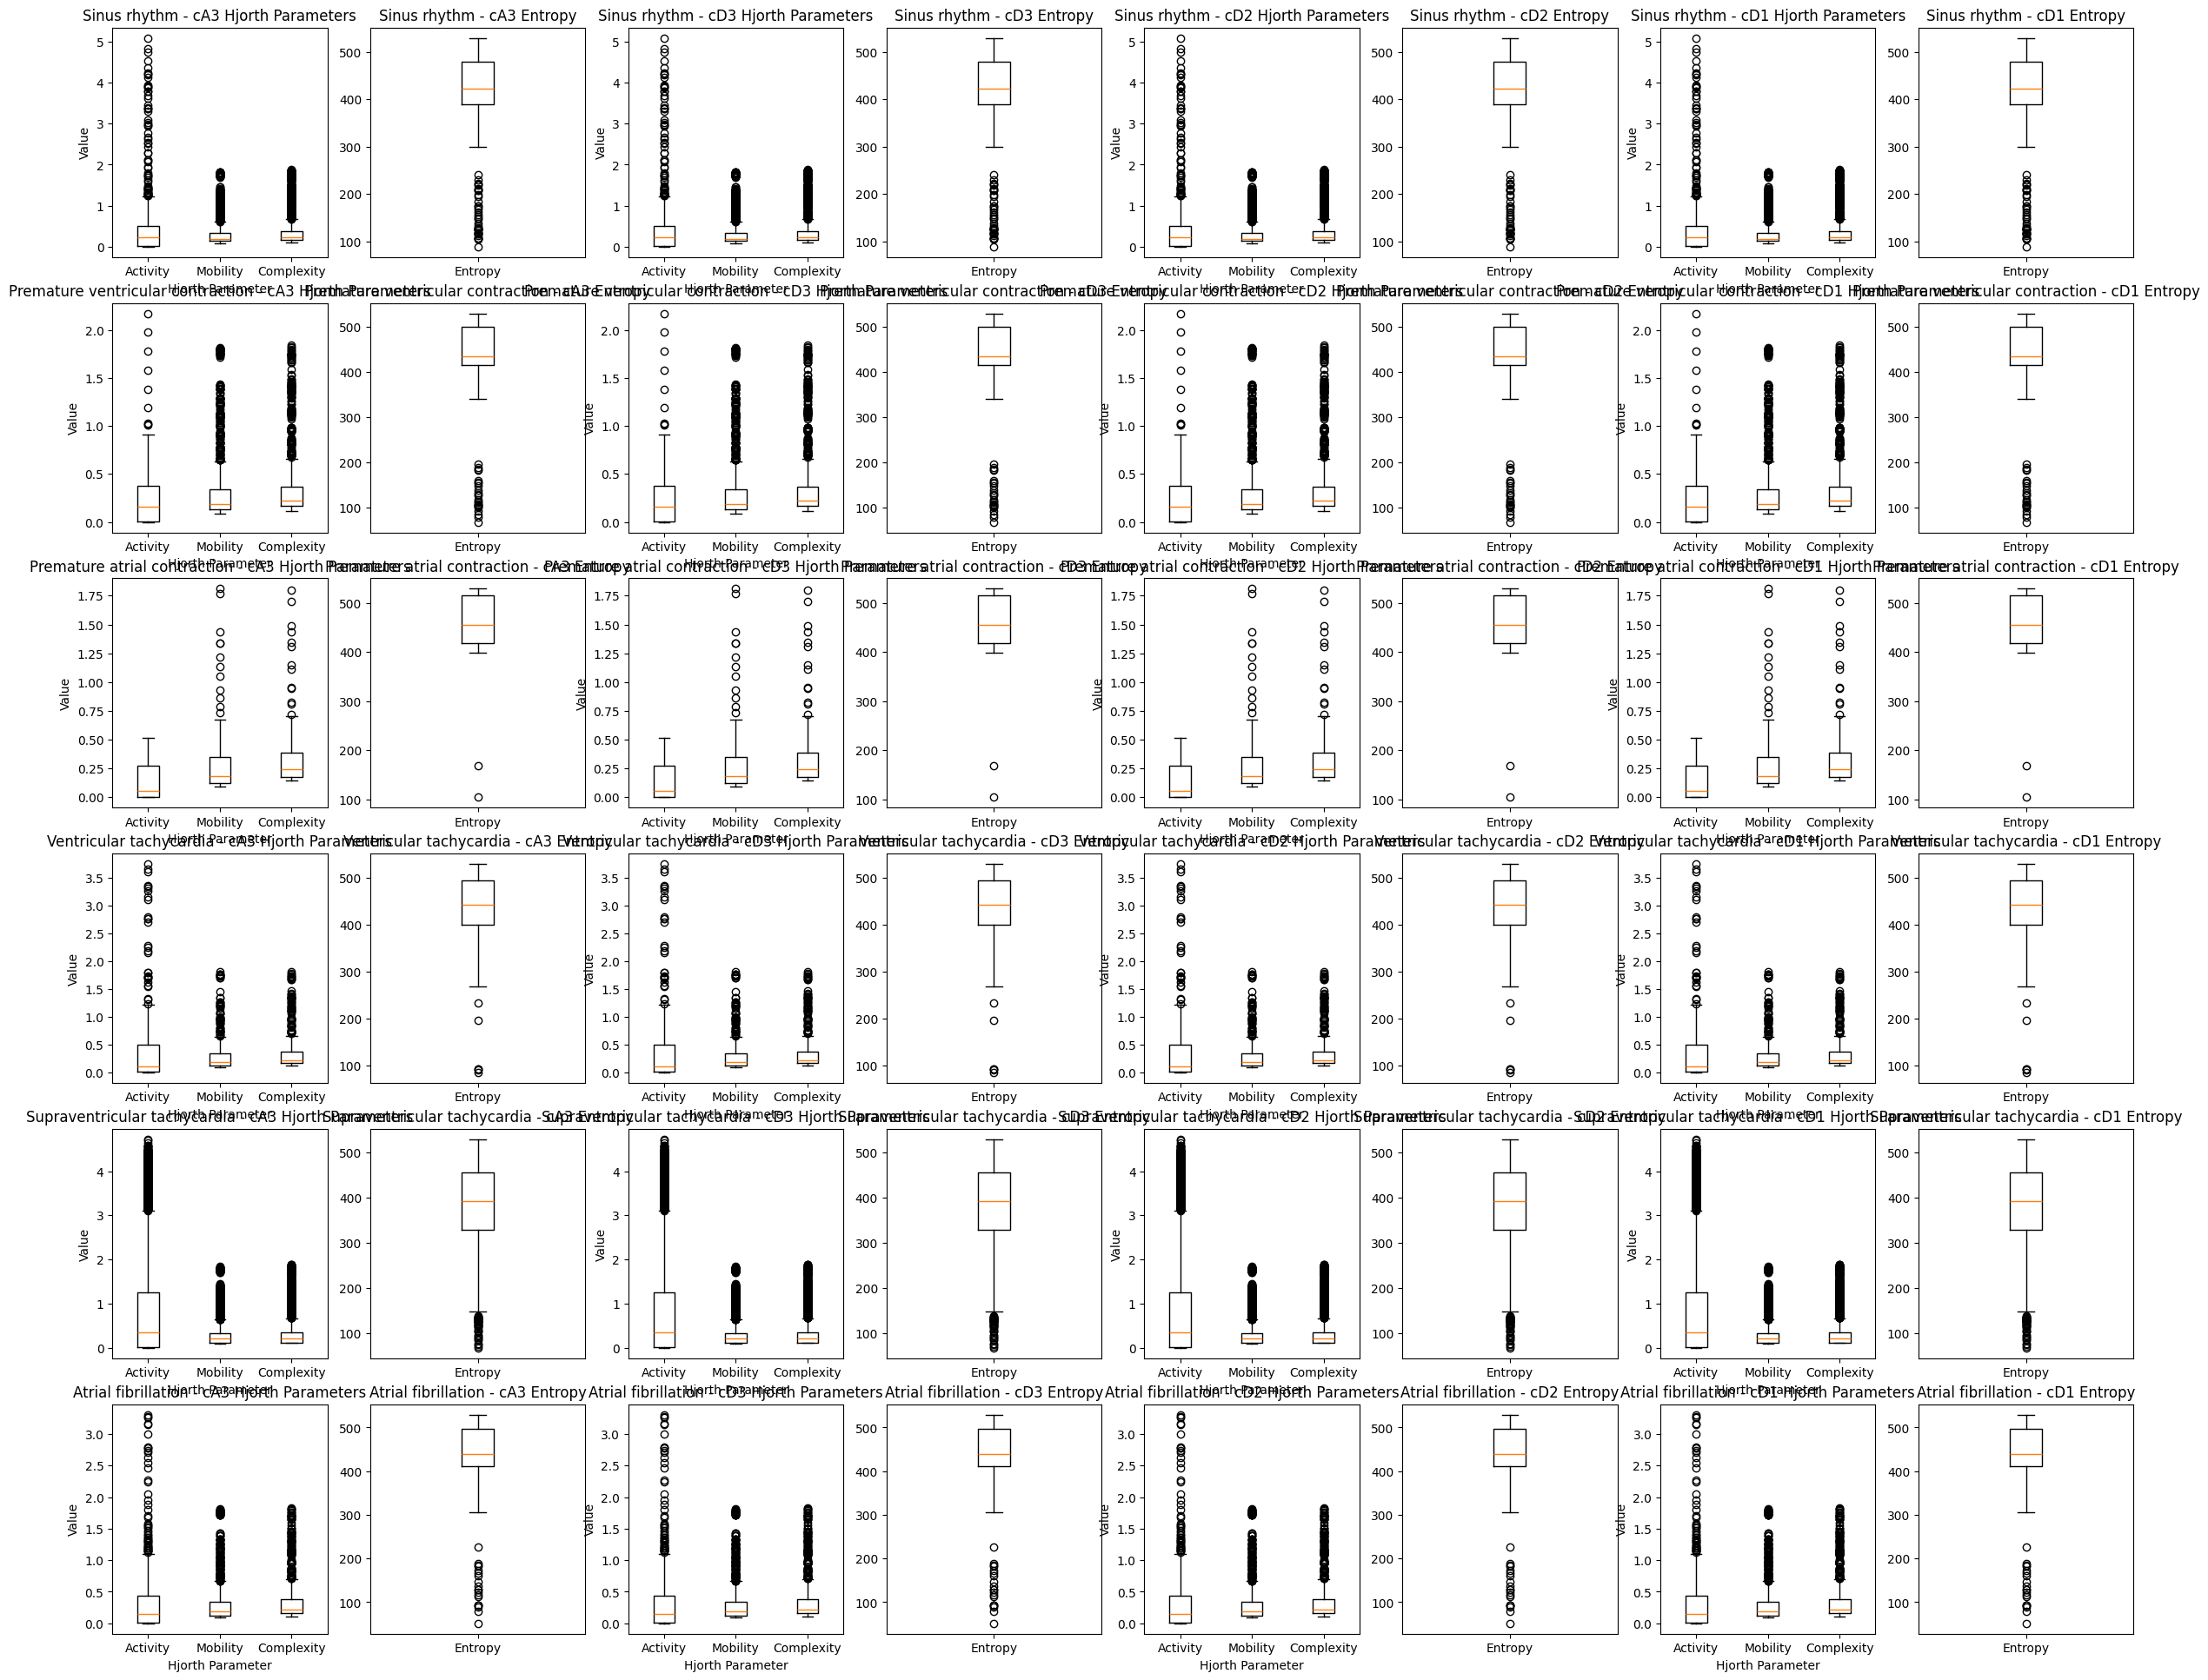

In [10]:
def hjorth_parameters(signal):
    activity = np.var(signal)
    if isinstance(signal, np.ndarray):
        if len(signal) <= 1:
            mobility = 0
            complexity = 0
        else:
            mobility = np.sqrt(np.var(np.diff(signal)) / activity)
            complexity = np.sqrt(np.var(np.diff(np.diff(signal))) / np.var(np.diff(signal)))
    else:
        mobility = 0
        complexity = 0
    return activity, mobility, complexity
 
def entropy(signal):
    signal_normalized = (signal - np.min(signal)) / (np.max(signal) - np.min(signal))
    entropy_val = -np.sum(signal_normalized * np.log2(signal_normalized + 1e-10))
    return entropy_val

hjorth_parameters_data = {label: {coeff_name: [] for coeff_name in ['cA3', 'cD3', 'cD2', 'cD1']} for label in unique_labels}
entropy_data = {label: {coeff_name: [] for coeff_name in ['cA3', 'cD3', 'cD2', 'cD1']} for label in unique_labels}

for label in unique_labels:
    ppg_subset = ppgseg[labels == label]
    for signal in ppg_subset:  
        widths = np.arange(1, 50)
        cwt_coeffs, _ = pywt.cwt(signal, widths, 'morl')
         
        for i, coeff_name in enumerate(['cA3', 'cD3', 'cD2', 'cD1']):
            for coeff in cwt_coeffs:
                hjorth_params = hjorth_parameters(coeff)
                hjorth_parameters_data[label][coeff_name].append(hjorth_params)
                
                entropy_vals = entropy(coeff)
                entropy_data[label][coeff_name].append(entropy_vals)

fig, axes = plt.subplots(len(unique_labels), 8, figsize=(30, 24))

for i, label in enumerate(unique_labels):
    for j, coeff_name in enumerate(['cA3', 'cD3', 'cD2', 'cD1']):
        hjorth_params = np.array(hjorth_parameters_data[label][coeff_name])
        entropy_vals = entropy_data[label][coeff_name]
        
        # Hjorth parameters box plot
        axes[i, j*2].boxplot(hjorth_params, labels=['Activity', 'Mobility', 'Complexity'])
        axes[i, j*2].set_title(f"{label_map[label]} - {coeff_name} Hjorth Parameters")
        axes[i, j*2].set_xlabel('Hjorth Parameter')
        axes[i, j*2].set_ylabel('Value')
        
        # Entropy box plot
        axes[i, j*2+1].boxplot(entropy_vals, labels=['Entropy'])
        axes[i, j*2+1].set_title(f"{label_map[label]} - {coeff_name} Entropy")


### Plotting for only 2 Classes

C:\Users\Harsh's PC\AppData\Local\Temp\ipykernel_18052\3615559034.py:45: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i*4, j].boxplot(hjorth_params[:, 0], labels=['Activity'])
C:\Users\Harsh's PC\AppData\Local\Temp\ipykernel_18052\3615559034.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i*4+1, j].boxplot(hjorth_params[:, 1], labels=['Mobility'])
C:\Users\Harsh's PC\AppData\Local\Temp\ipykernel_18052\3615559034.py:55: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i*4+2, j].boxplot(hjorth_params[:, 2], labels=['Complexity'])
C:\Users\Harsh's PC\AppData\Local\Temp\ipykernel_18052\3615559034.py:60: 

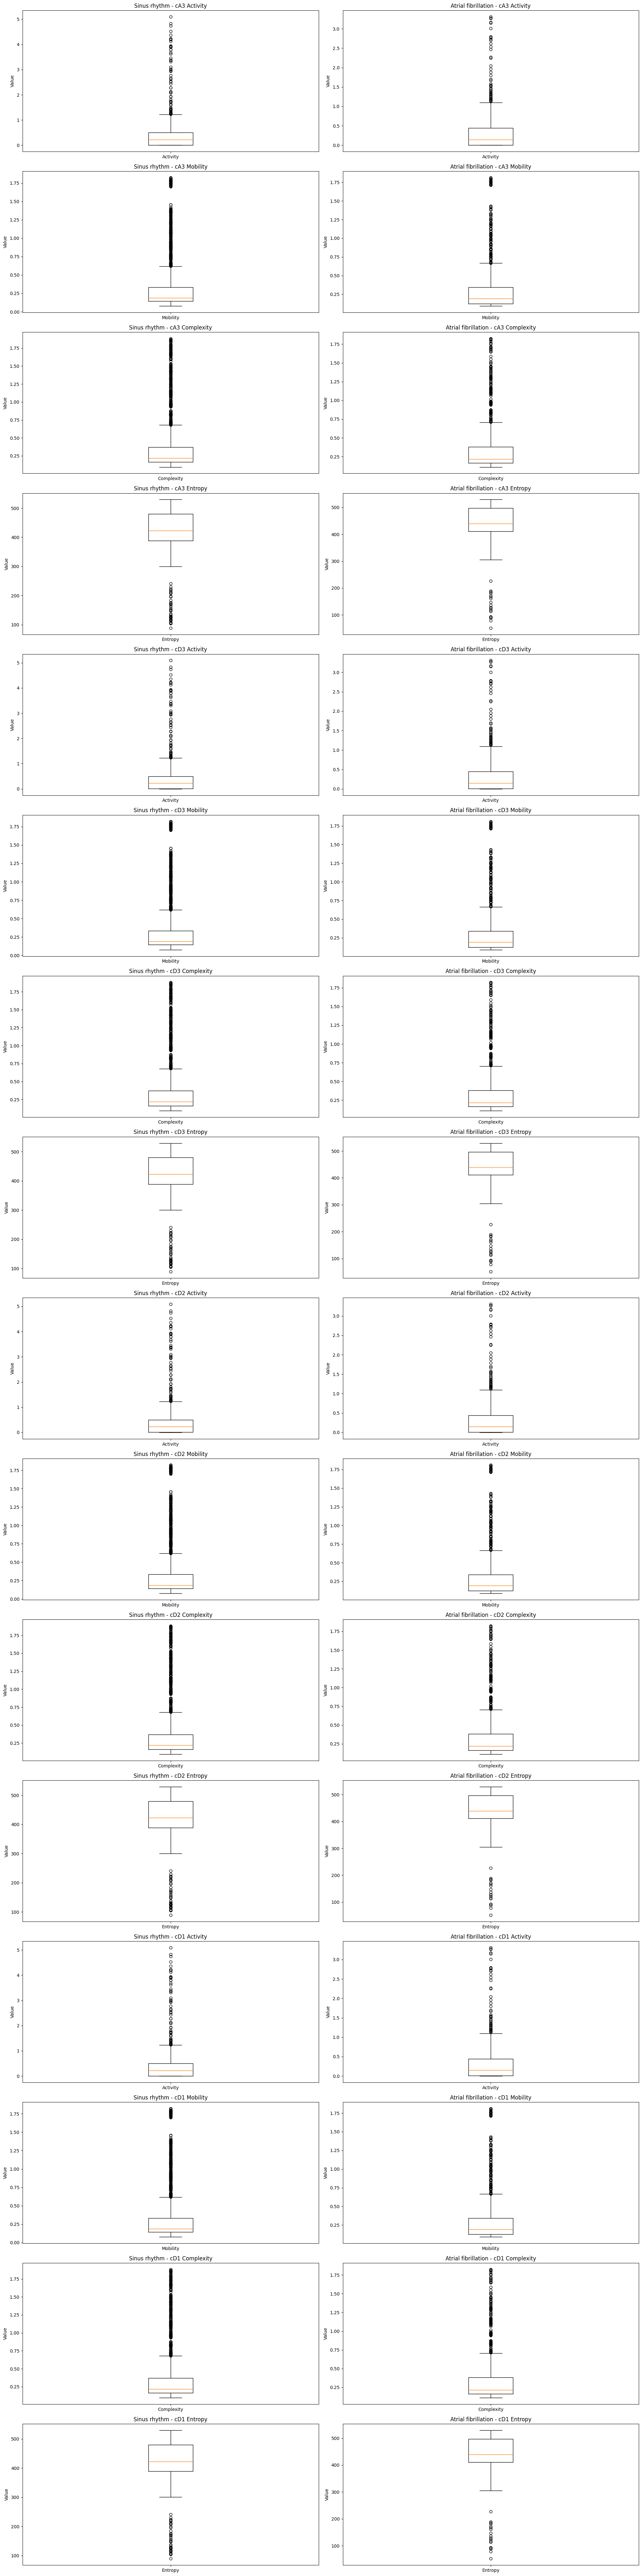

In [11]:
def hjorth_parameters(signal):
    activity = np.var(signal)
    if isinstance(signal, np.ndarray):
        if len(signal) <= 1:
            mobility = 0
            complexity = 0
        else:
            mobility = np.sqrt(np.var(np.diff(signal)) / activity)
            complexity = np.sqrt(np.var(np.diff(np.diff(signal))) / np.var(np.diff(signal)))
    else:
        mobility = 0
        complexity = 0
    return activity, mobility, complexity

def entropy(signal):
    signal_normalized = (signal - np.min(signal)) / (np.max(signal) - np.min(signal))
    entropy_val = -np.sum(signal_normalized * np.log2(signal_normalized + 1e-10))
    return entropy_val

hjorth_parameters_data = {label: {coeff_name: [] for coeff_name in ['cA3', 'cD3', 'cD2', 'cD1']} for label in [0, 5]}
entropy_data = {label: {coeff_name: [] for coeff_name in ['cA3', 'cD3', 'cD2', 'cD1']} for label in [0, 5]}

for label in [0, 5]:
    ppg_subset = ppgseg[labels == label]
    for signal in ppg_subset:
        widths = np.arange(1, 50)
        cwt_coeffs, _ = pywt.cwt(signal, widths, 'morl')
        
        for i, coeff_name in enumerate(['cA3', 'cD3', 'cD2', 'cD1']):
            for coeff in cwt_coeffs:
                hjorth_params = hjorth_parameters(coeff)
                hjorth_parameters_data[label][coeff_name].append(hjorth_params)
                
                entropy_vals = entropy(coeff)
                entropy_data[label][coeff_name].append(entropy_vals)

fig, axes = plt.subplots(16, 2, figsize=(20, 80))

for i, coeff_name in enumerate(['cA3', 'cD3', 'cD2', 'cD1']):
    for j, label in enumerate([0, 5]):
        hjorth_params = np.array(hjorth_parameters_data[label][coeff_name])
        entropy_vals = entropy_data[label][coeff_name]
        
        # Plot activity
        axes[i*4, j].boxplot(hjorth_params[:, 0], labels=['Activity'])
        axes[i*4, j].set_title(f"{label_map[label]} - {coeff_name} Activity")
        axes[i*4, j].set_ylabel('Value')

        # Plot mobility
        axes[i*4+1, j].boxplot(hjorth_params[:, 1], labels=['Mobility'])
        axes[i*4+1, j].set_title(f"{label_map[label]} - {coeff_name} Mobility")
        axes[i*4+1, j].set_ylabel('Value')

        # Plot complexity
        axes[i*4+2, j].boxplot(hjorth_params[:, 2], labels=['Complexity'])
        axes[i*4+2, j].set_title(f"{label_map[label]} - {coeff_name} Complexity")
        axes[i*4+2, j].set_ylabel('Value')
        
        # Plot entropy
        axes[i*4+3, j].boxplot(entropy_vals, labels=['Entropy'])
        axes[i*4+3, j].set_title(f"{label_map[label]} - {coeff_name} Entropy")
        axes[i*4+3, j].set_ylabel('Value')

plt.tight_layout()
plt.show()


### Checking Cuda

In [12]:
import torch
torch.cuda.is_available()

True

In [13]:
import torch
if torch.cuda.is_available():
    print("CUDA is available. Here are the details of the CUDA devices:")
    num_devices = torch.cuda.device_count()
    print(f"Number of CUDA devices: {num_devices}")
    
    for i in range(num_devices):
        print(f"\nDevice {i}:")
        print(f"    Name: {torch.cuda.get_device_name(i)}")
        print(f"    Capability: {torch.cuda.get_device_capability(i)}")
        print(f"    Memory Allocated: {torch.cuda.memory_allocated(i)} bytes")
        print(f"    Memory Cached: {torch.cuda.memory_reserved(i)} bytes")
else:
    print("CUDA is not available.")


CUDA is available. Here are the details of the CUDA devices:
Number of CUDA devices: 1

Device 0:
    Name: NVIDIA RTX A4000
    Capability: (8, 6)
    Memory Allocated: 0 bytes
    Memory Cached: 0 bytes


### Loading all the files